In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read file into a dataframe
call = pd.read_csv("January_MyCall_2022.csv")
len(call)

620

In [3]:
#drop rows with 'Unknown' in network_type column
call['network_type'].to_string()
for i in range (len(call['network_type'])):
    if 'n' in call['network_type'][i]:
        call.drop([i], inplace=True)

call

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,BSNL,Indoor,3G,3,Satisfactory,-1.000000,-1.000000,NA
1,BSNL,Indoor,2G,3,Poor Voice Quality,-1.000000,-1.000000,NA
2,BSNL,Indoor,2G,3,Satisfactory,-1.000000,-1.000000,NA
3,BSNL,Indoor,3G,3,Satisfactory,-1.000000,-1.000000,NA
4,RJio,Outdoor,4G,4,Satisfactory,18.519782,73.856190,Maharashtra
...,...,...,...,...,...,...,...,...
615,VI,Indoor,4G,5,Satisfactory,23.163830,77.445925,Madhya Pradesh
616,VI,Outdoor,3G,1,Call Dropped,-1.000000,-1.000000,NA
617,VI,Indoor,4G,1,Poor Voice Quality,-1.000000,-1.000000,NA
618,VI,Indoor,4G,1,Call Dropped,-1.000000,-1.000000,NA


Text(0.5, 0, 'Operator')

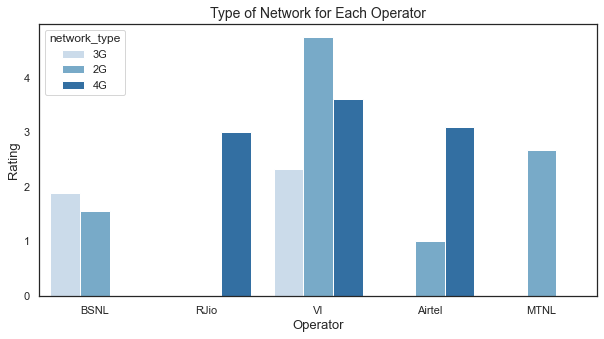

In [4]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("white")
sns.barplot(x="operator", y="rating", hue="network_type", data=call, ci=False, palette="Blues")
plt.title("Type of Network for Each Operator",fontsize=14)
plt.ylabel('Rating',fontsize=13)
plt.xlabel('Operator',fontsize=13)

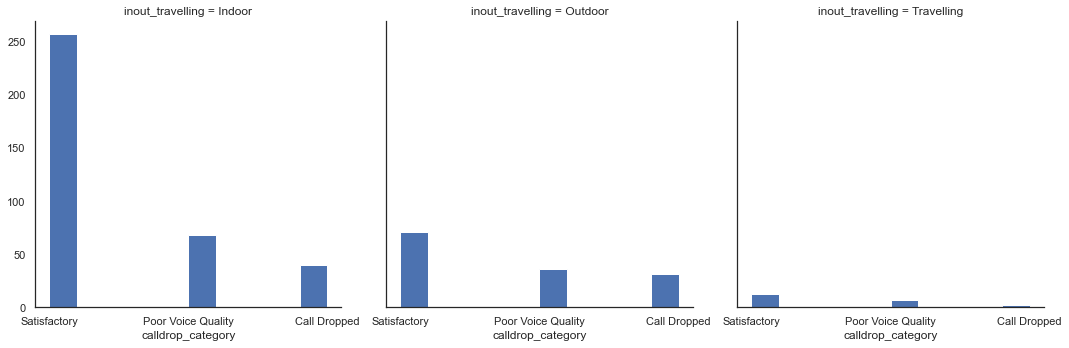

In [5]:
#sns.histplot(x = 'calldrop_category', data = call, binwidth = 10);
g = sns.FacetGrid(call, col ='inout_travelling', size = 5)
g.map(plt.hist, 'calldrop_category')

plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Indoor'), Text(1, 0, 'Outdoor'), Text(2, 0, 'Travelling')])

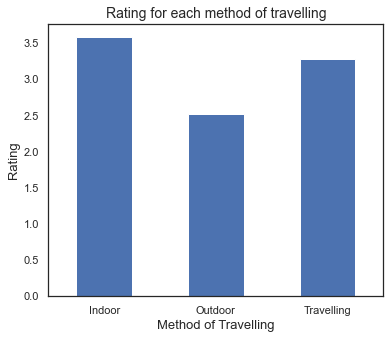

In [6]:
sns.set(rc={'figure.figsize':(6,5)})
sns.set_style("white")
call.groupby('inout_travelling')['rating'].mean().plot.bar()
plt.title("Rating for each method of travelling",fontsize=14)
plt.ylabel('Rating',fontsize=13)
plt.xlabel('Method of Travelling',fontsize=13)
plt.xticks(rotation=0)

In [7]:
# drop rows with "NA" in state name colomn
filter_mask=call['state_name']=='NA '

call = call[~filter_mask]
call

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
4,RJio,Outdoor,4G,4,Satisfactory,18.519782,73.856190,Maharashtra
5,RJio,Outdoor,4G,4,Satisfactory,18.519782,73.856190,Maharashtra
6,RJio,Outdoor,4G,4,Satisfactory,18.519751,73.856182,Maharashtra
7,RJio,Indoor,4G,4,Satisfactory,18.519790,73.856216,Maharashtra
8,RJio,Outdoor,4G,4,Satisfactory,18.519780,73.856229,Maharashtra
...,...,...,...,...,...,...,...,...
607,VI,Indoor,4G,5,Satisfactory,23.163738,77.446015,Madhya Pradesh
608,VI,Indoor,4G,5,Satisfactory,23.163756,77.446695,Madhya Pradesh
614,BSNL,Outdoor,3G,1,Call Dropped,12.925411,77.618788,Karnataka
615,VI,Indoor,4G,5,Satisfactory,23.163830,77.445925,Madhya Pradesh


In [8]:
# raking rows based on rating from highest to lowest
call['rating_rank'] = call['rating'].rank(ascending = 0)

call = call.set_index('rating_rank')
call = call.sort_index()
call

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
rating_rank,,,,,,,,
50.0,VI,Indoor,4G,5,Satisfactory,21.123185,79.067932,Maharashtra
50.0,VI,Indoor,4G,5,Satisfactory,23.182496,77.437907,Madhya Pradesh
50.0,VI,Indoor,4G,5,Satisfactory,23.182496,77.437907,Madhya Pradesh
50.0,VI,Indoor,4G,5,Satisfactory,23.182496,77.437907,Madhya Pradesh
50.0,VI,Indoor,4G,5,Satisfactory,23.182496,77.437907,Madhya Pradesh
...,...,...,...,...,...,...,...,...
204.0,Airtel,Outdoor,4G,1,Call Dropped,18.807395,73.332025,Maharashtra
204.0,Airtel,Outdoor,4G,1,Call Dropped,18.790662,73.356815,Maharashtra
204.0,VI,Outdoor,4G,1,Call Dropped,28.627843,77.059394,Delhi


In [9]:
# define x and y for the classification model and split the data into training and testing in 70:30 ratio.
from sklearn.model_selection import train_test_split
X = call[['latitude','longitude','rating']]
y = call[["rating"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [11]:
# stimulate a logistic regression model based on x and y training data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [13]:
# perdict y given x, and form a confusion matrix
y_pred = lr.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0, 25,  1],
       [ 0,  0,  0,  1, 26]], dtype=int64)

<AxesSubplot:>

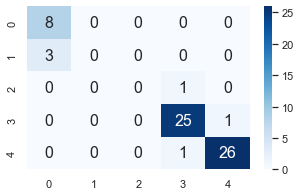

In [14]:
# correlation heatmap based on the confusion matrix
plt.figure(figsize = (5,3))
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [15]:
# genenrate a classification report between testing data and predicting data
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      1.00      0.84         8
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.93      0.96      0.94        26
           5       0.96      0.96      0.96        27

    accuracy                           0.91        65
   macro avg       0.52      0.58      0.55        65
weighted avg       0.86      0.91      0.88        65

